In [1]:
%autosave 10
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy
from astropy import units as u
from astropy import constants as c

from astropy.utils import iers
iers.conf.auto_download = False

Autosaving every 10 seconds


In [4]:
c.G

<<class 'astropy.constants.codata2014.CODATA2014'> name='Gravitational constant' value=6.67408e-11 uncertainty=3.1e-15 unit='m3 / (kg s2)' reference='CODATA 2014'>

In [5]:
c.G.cgs

<Quantity 6.674079999999999e-08 cm3 / (g s2)>

In [10]:
c.G.cgs.value

6.674079999999999e-08

In [21]:
v = np.sqrt(c.G * c.M_sun / c.au)
display(v)
print(v.to(unit=u.cm/u.s).value)
pc_per_year = u.pc / u.year
print(v.to(unit=pc_per_year))

<Quantity 29784.691829676933 m / s>

2978469.182967693
3.046116666658638e-05 pc / yr


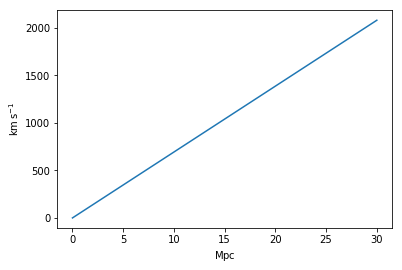

In [25]:
from astropy import visualization
from astropy import cosmology
distance = np.linspace(0, 30, 1000) * u.Mpc
velocity = cosmology.WMAP9.H0 * distance
with visualization.quantity_support():
    plt.plot(distance, velocity)

In [26]:
u.Angstrom.find_equivalent_units()

  Primary name | Unit definition | Aliases                         
[
  AU           | 1.49598e+11 m   | au, astronomical_unit            ,
  Angstrom     | 1e-10 m         | AA, angstrom                     ,
  cm           | 0.01 m          | centimeter                       ,
  earthRad     | 6.3781e+06 m    | R_earth, Rearth                  ,
  jupiterRad   | 7.1492e+07 m    | R_jup, Rjup, R_jupiter, Rjupiter ,
  lyr          | 9.46073e+15 m   | lightyear                        ,
  m            | irreducible     | meter                            ,
  micron       | 1e-06 m         |                                  ,
  pc           | 3.08568e+16 m   | parsec                           ,
  solRad       | 6.957e+08 m     | R_sun, Rsun                      ,
]

In [46]:
noise = 10. * u.count / np.sqrt(1. * u.s)
from fractions import Fraction
noise_unit = u.count / u.s**(Fraction(2, 7) + Fraction(1,5))
noise_unit

Unit("ct / s(17/35)")

In [52]:
m1 = u.Magnitude(10 * u.count / u.s)
m2 = u.Magnitude(10 * u.count / u.day)
dm = m2 - m1
print(dm)
print(dm.decompose())

0.0 mag(s / d)
12.341284356197233 mag


In [51]:
m1 = 1. * u.mag
m2 = 2. * u.mag
m1 + m2

<Quantity 3.0 mag>

In [53]:
1e-3 * u.cm + 1e3 * u.AA

<Quantity 0.00101 cm>

In [64]:
from astropy import coordinates
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import time

coords = SkyCoord('05h35m17.3s -05d23m28s')
print(coords)
coords1 = SkyCoord(ra=5.55*u.hourangle, dec=-5.12*u.degree)
print(coords1)

t = time.Time.now()
subaru = EarthLocation.of_site('subaru')
# print(subaru.geodetic)
sai = EarthLocation.of_address(
    'Университеский проспект 13, Москва'
)
print(sai.geodetic)

altaz = coords.transform_to(AltAz(obstime=t, location=sai))
print(altaz)

<SkyCoord (ICRS): (ra, dec) in deg
    ( 83.82208333, -5.39111111)>
<SkyCoord (ICRS): (ra, dec) in deg
    ( 83.25, -5.12)>
GeodeticLocation(lon=<Longitude 37.54271390000001 deg>, lat=<Latitude 55.701001 deg>, height=<Quantity 0.0 m>)
<SkyCoord (AltAz: obstime=2017-11-03 11:15:37.201519, location=(2856334.5920212837, 2195127.714848709, 5245754.619443852) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0, obswl=1.0 micron): (az, alt) in deg
    ( 341.22681092, -38.32767594)>


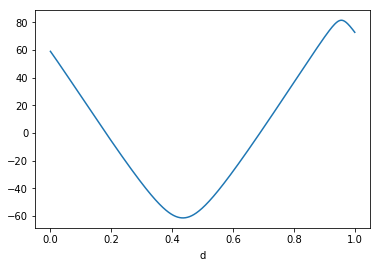

In [72]:
dt = np.linspace(0, 1, 1000) * u.day
t_ = time.Time.now() + dt
moon = coordinates.get_moon(t_)
keck = EarthLocation.of_site('Keck')
moon_altaz = moon.transform_to(AltAz(location=keck))
with visualization.quantity_support():
    plt.plot(dt, moon_altaz.alt.to(u.degree))

(-183, -104)

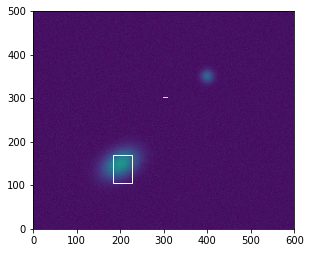

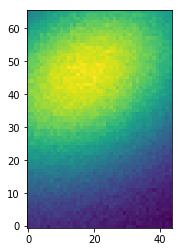

In [97]:
from astropy import nddata
from astropy import modeling

y, x = np.mgrid[0:500, 0:600]
data = (
    modeling.models.Gaussian2D(
        0.5,  # высота
        200, 150,   # положение
        30, 20,  # ширина
        theta=(30*u.degree).to(u.radian).value
    )(x, y)
    + modeling.models.Gaussian2D(
        0.3,  # высота
        400, 350,   # положение
        10, 10,  # ширина
    )(x, y)
)
data += 0.01 * np.random.normal(size=data.shape)
data[300:303, 300:310] = 1
plt.imshow(data, origin='lower')

cutout = nddata.Cutout2D(data, (205.1, 137.3), (66, 44.5))
cutout.plot_on_original(color='w')

plt.figure()
plt.imshow(cutout.data, origin='lower')
cutout.to_cutout_position((0,0))

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  800                                                  NAXIS2  =                  448                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

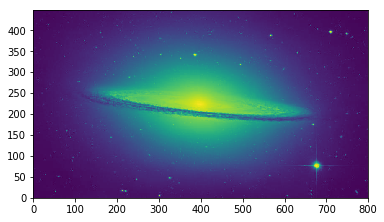

In [102]:
from astropy.io import fits, ascii
sombr = fits.open('sombrero.fits')
plt.imshow(sombr[0].data, origin='lower')
print(sombr[0].header)

In [104]:
from astropy.io import ascii
table = ascii.read('freddi.dat')
ascii.write(table['t', 'Mdot'][:20], 'table.tex', format='latex')